In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
input=pd.read_csv(r'C:\Users\User\Downloads/mental_health_data.csv')

In [4]:
input.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [5]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [6]:
# Check the unique values in each column
for column in input.columns:
    unique_values = sorted(input[column].unique())
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")

Column 'Age' has 4 unique values: ['16-20', '20-25', '25-30', '30-Above']
Column 'Gender' has 2 unique values: ['Female', 'Male']
Column 'Occupation' has 5 unique values: ['Business', 'Corporate', 'Housewife', 'Others', 'Student']
Column 'Days_Indoors' has 5 unique values: ['1-14 days', '15-30 days', '31-60 days', 'Go out Every day', 'More than 2 months']
Column 'Growing_Stress' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Quarantine_Frustrations' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Changes_Habits' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Mental_Health_History' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Weight_Change' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Mood_Swings' has 3 unique values: ['High', 'Low', 'Medium']
Column 'Coping_Struggles' has 2 unique values: ['No', 'Yes']
Column 'Work_Interest' has 3 unique values: ['Maybe', 'No', 'Yes']
Column 'Social_Weakness' has 3 unique values: ['Maybe', 'No', 'Yes']


In [7]:
input.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns and store mappings
label_encoders = {}
mappings = {}

for column in input.columns:
    le = LabelEncoder()
    input[column] = le.fit_transform(input[column])
    label_encoders[column] = le
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Check the unique values in each column and their mappings
for column in input.columns:
    unique_values = sorted(input[column].unique())
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")
    print(f"Mappings: {mappings[column]}")

# Display the encoded data
#print(input)

Column 'Age' has 4 unique values: [0, 1, 2, 3]
Mappings: {'16-20': 0, '20-25': 1, '25-30': 2, '30-Above': 3}
Column 'Gender' has 2 unique values: [0, 1]
Mappings: {'Female': 0, 'Male': 1}
Column 'Occupation' has 5 unique values: [0, 1, 2, 3, 4]
Mappings: {'Business': 0, 'Corporate': 1, 'Housewife': 2, 'Others': 3, 'Student': 4}
Column 'Days_Indoors' has 5 unique values: [0, 1, 2, 3, 4]
Mappings: {'1-14 days': 0, '15-30 days': 1, '31-60 days': 2, 'Go out Every day': 3, 'More than 2 months': 4}
Column 'Growing_Stress' has 3 unique values: [0, 1, 2]
Mappings: {'Maybe': 0, 'No': 1, 'Yes': 2}
Column 'Quarantine_Frustrations' has 3 unique values: [0, 1, 2]
Mappings: {'Maybe': 0, 'No': 1, 'Yes': 2}
Column 'Changes_Habits' has 3 unique values: [0, 1, 2]
Mappings: {'Maybe': 0, 'No': 1, 'Yes': 2}
Column 'Mental_Health_History' has 3 unique values: [0, 1, 2]
Mappings: {'Maybe': 0, 'No': 1, 'Yes': 2}
Column 'Weight_Change' has 3 unique values: [0, 1, 2]
Mappings: {'Maybe': 0, 'No': 1, 'Yes': 2}
Co

In [9]:
input.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,0,1,0,2,2,1,2,2,2,0,1,2
1,3,1,3,2,2,2,0,1,1,0,0,1,2
2,3,0,4,3,1,1,2,1,1,2,1,0,1
3,2,1,3,0,2,1,0,1,0,2,0,0,2
4,0,0,4,4,2,2,2,1,2,2,1,0,1


In [10]:
col=['Age','Gender','Occupation','Work_Interest']

for var in col:
  value_counts = input[var].value_counts()
  # Calculate the percentage of each value
  percentage_counts = value_counts / len(input) * 100
  print("Percentage of each unique value in " +var+ " column:")
  print(percentage_counts)

Percentage of each unique value in Age column:
Age
3    26.941748
0    25.606796
2    24.878641
1    22.572816
Name: count, dtype: float64
Percentage of each unique value in Gender column:
Gender
0    52.669903
1    47.330097
Name: count, dtype: float64
Percentage of each unique value in Occupation column:
Occupation
2    22.451456
4    21.844660
1    19.296117
3    18.810680
0    17.597087
Name: count, dtype: float64
Percentage of each unique value in Work_Interest column:
Work_Interest
1    35.800971
0    34.101942
2    30.097087
Name: count, dtype: float64


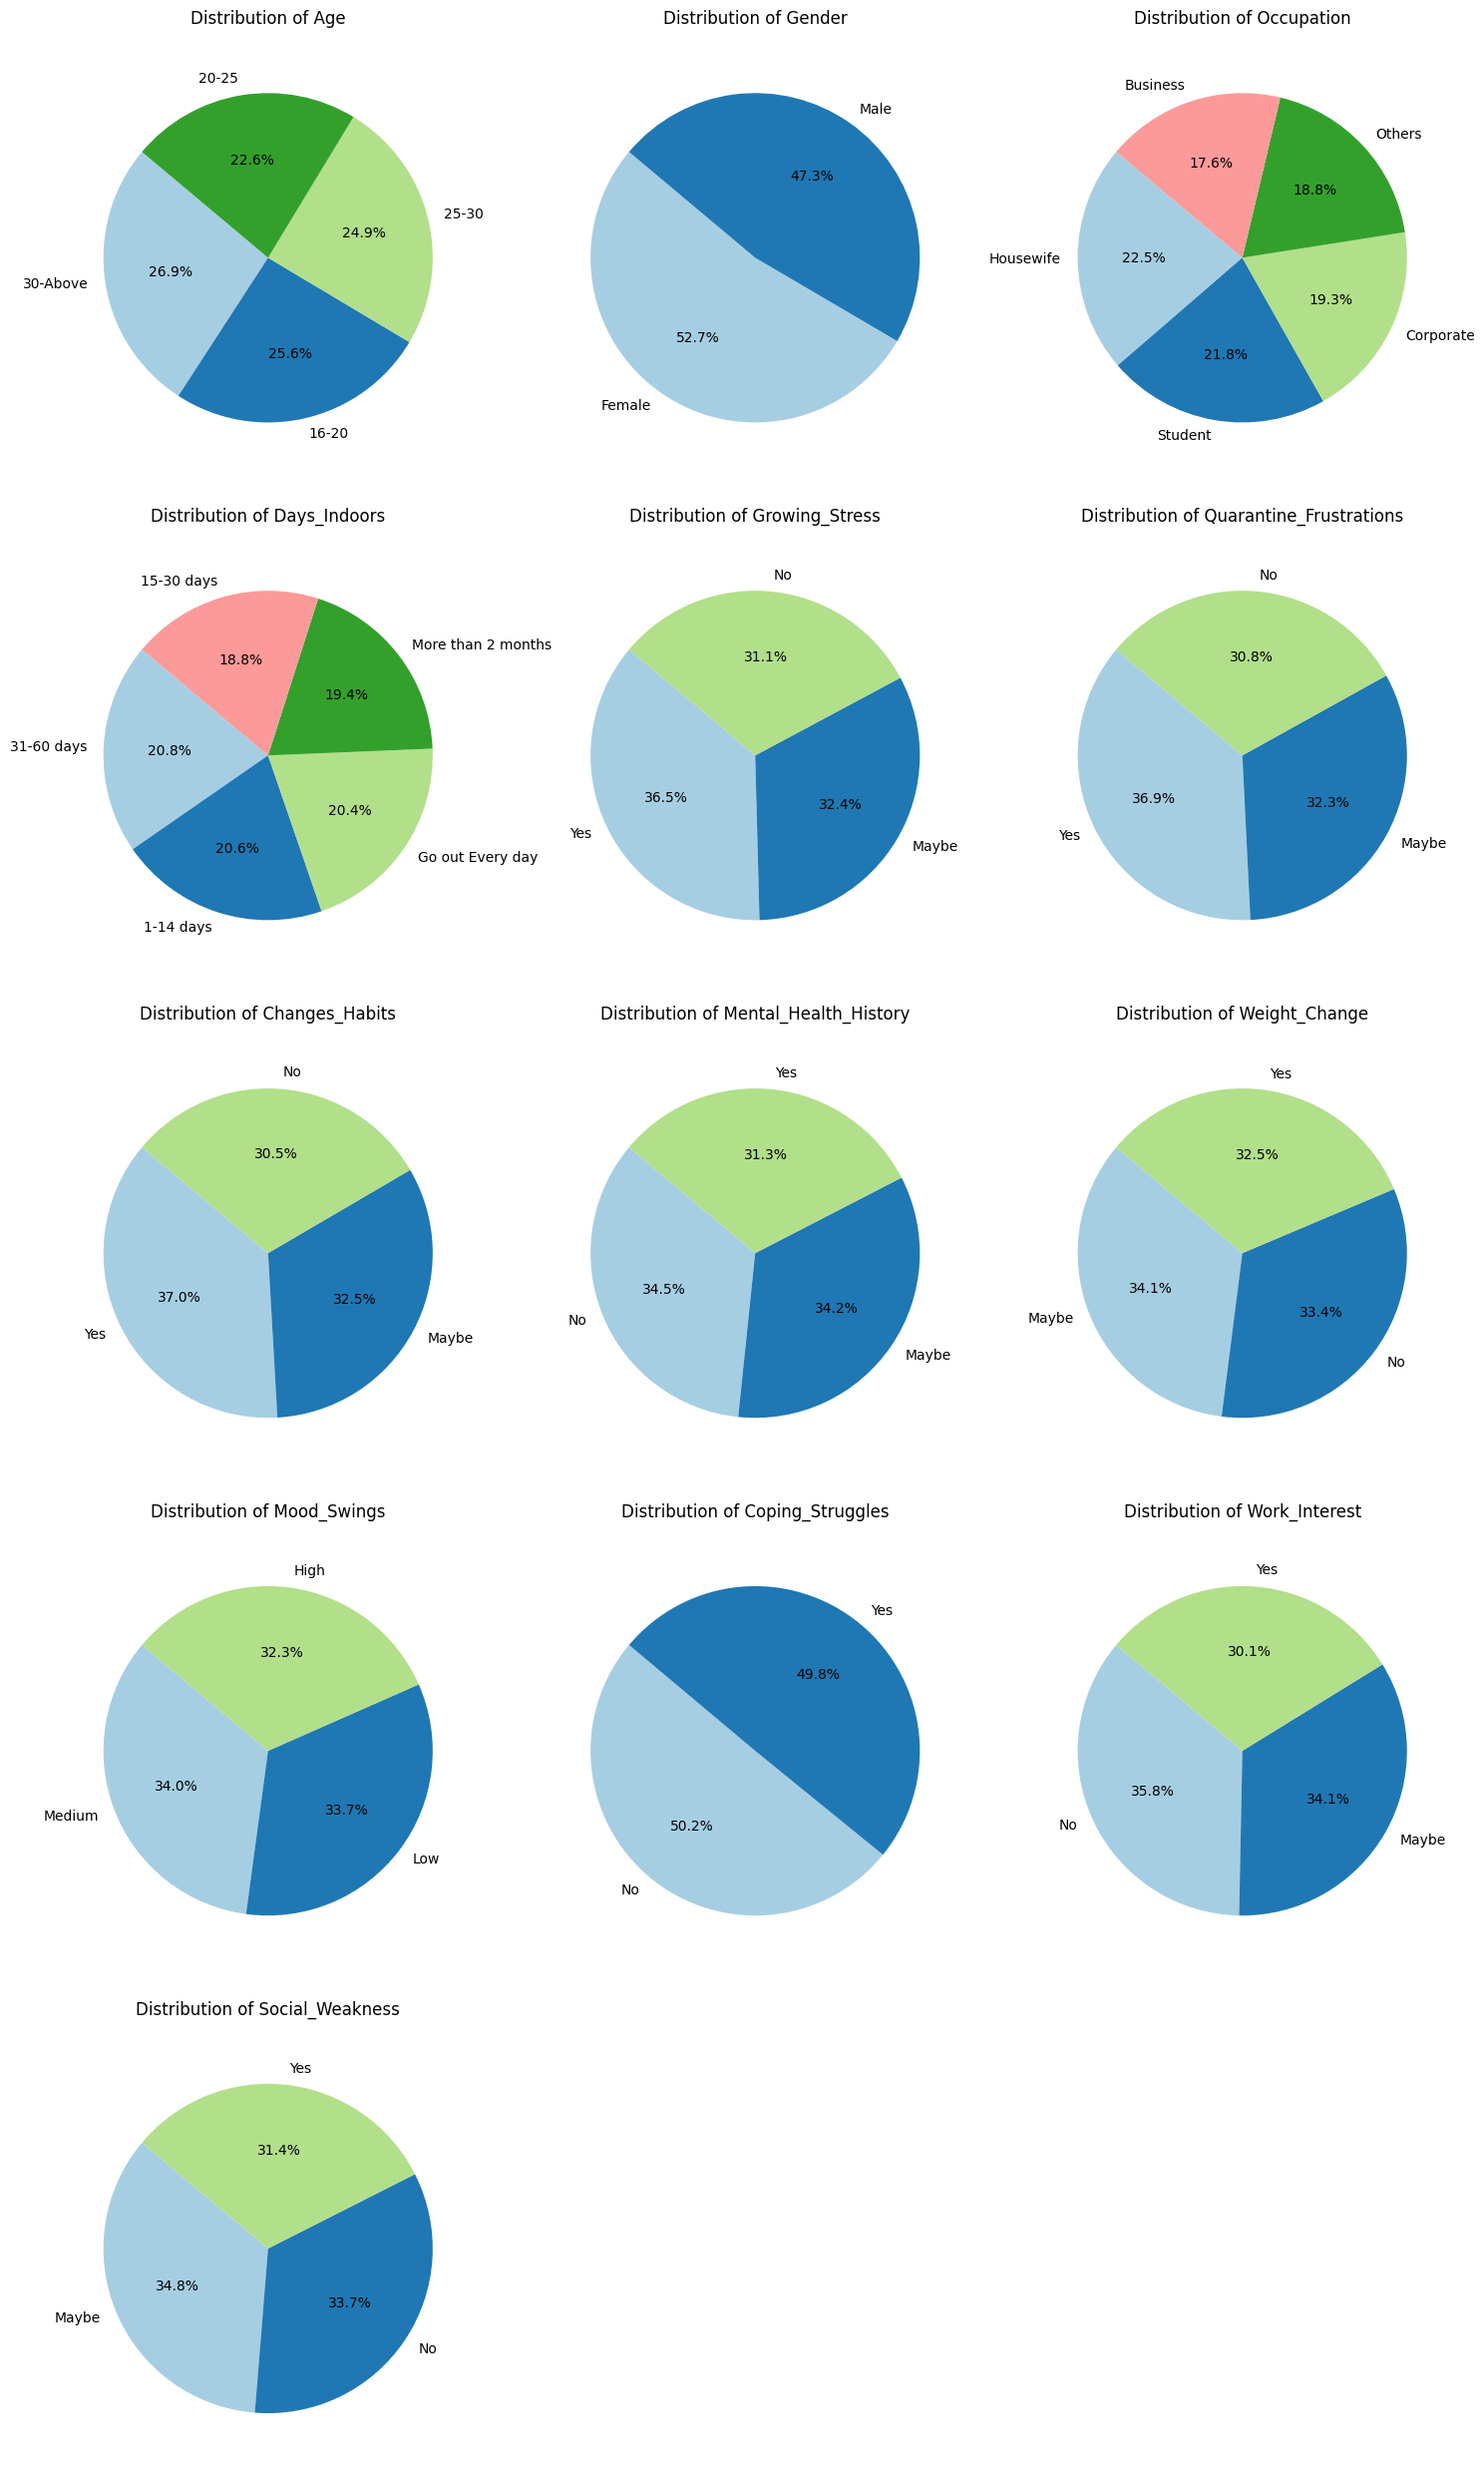

In [11]:
# Function to create pie charts
def create_pie_chart(ax, column_name, data, mappings):
    counts = data[column_name].value_counts()
    labels = [list(mappings[column_name].keys())[list(mappings[column_name].values()).index(i)] for i in counts.index]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(f'Distribution of {column_name}')
    ax.axis('equal')

# Number of columns for the subplot grid
num_columns = 3
num_plots = len(input.columns)

# Calculate number of rows needed
num_rows = (num_plots + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten axes array if there's more than one row
if num_rows > 1:
    axes = axes.flatten()

# Create pie charts for each categorical variable
for i, column in enumerate(input.columns):
    create_pie_chart(axes[i], column, input, mappings)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [12]:
input.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,1.531553,0.473301,2.080097,1.991505,1.041262,1.046117,1.044903,0.970874,0.984223,1.016990,0.497573,0.959951,0.966019
std,1.140857,0.499590,1.398104,1.412899,0.829731,0.830938,0.833195,0.809498,0.816592,0.814333,0.500298,0.800727,0.813800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,3.000000,1.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000


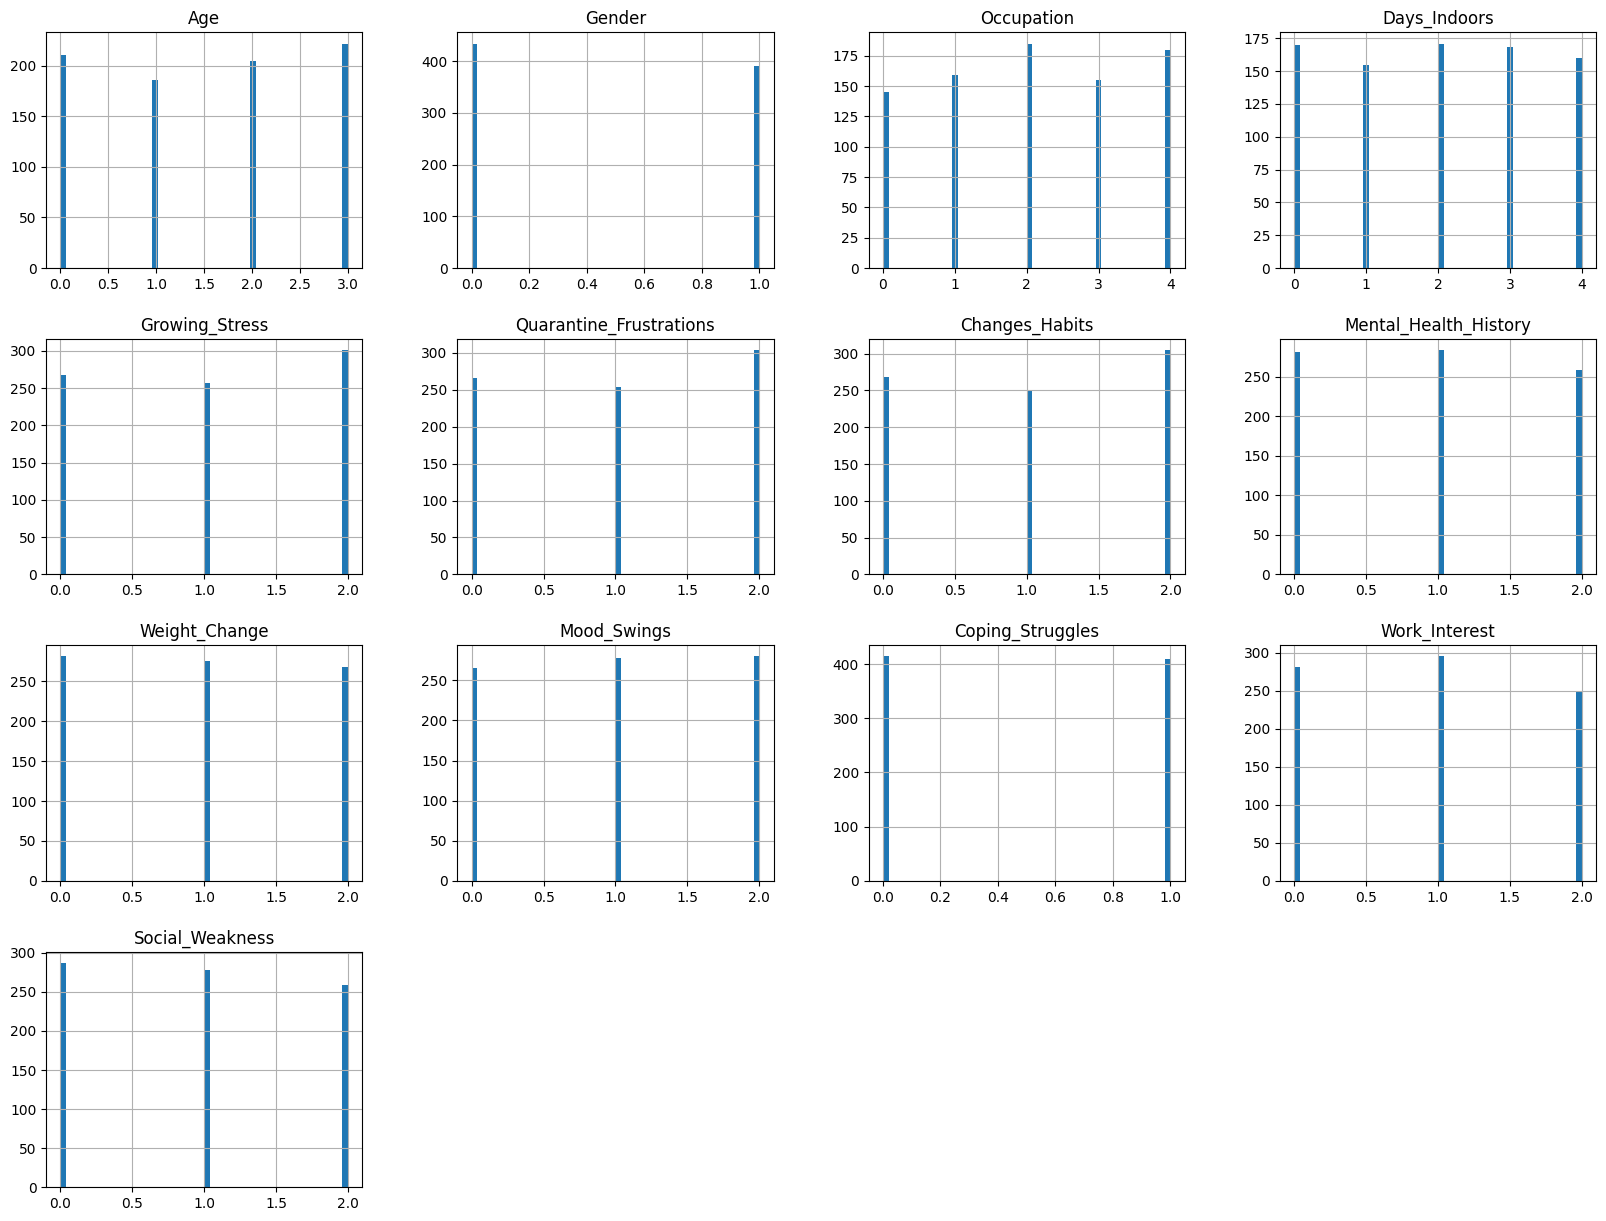

In [13]:
input.hist(bins=50, figsize=(20,15))
plt.show()


# Table 1. Descriptive statistics of the final sample (N = 824)

| Sociodemographics       | M (SD)          | Percent |
|-------------------------|-----------------|---------|
| **Gender**              |                 |         |
| Female                  |                 | 52.67   |
| Male                    |                 | 47.33   |
| **Age**                 |                 |         |
| 16-20                   |                 | 25.61   |
| 20-25                   |                 | 22.57   |
| 25-30                   |                 | 24.87   |
| 30 above                |                 | 26.95   |
| **Occupation**          |                 |         |
| Business                |                 | 17.60   |
| Corporate               |                 | 19.30   |
| Housewife               |                 | 22.45   |
| Student                 |                 | 21.84   |
| Others                  |                 | 18.81    |


In [14]:
input_copy=input.copy()
corr_matrix = input_copy.corr()
display(corr_matrix)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
Age,1.000000,-0.017707,0.000699,0.039741,-0.041169,-0.065624,0.070730,0.025994,-0.017072,0.012501,-0.010510,0.029982,0.007700
Gender,-0.017707,1.000000,-0.029987,-0.028724,-0.073551,0.005897,0.007262,0.037133,-0.062091,0.027996,-0.073180,-0.025457,-0.011200
Occupation,0.000699,-0.029987,1.000000,0.022489,-0.013327,-0.072213,-0.018737,-0.003304,0.043679,-0.082306,0.005490,-0.025351,-0.029643
Days_Indoors,0.039741,-0.028724,0.022489,1.000000,-0.058779,-0.018295,0.008582,-0.058647,-0.018020,0.009630,0.047242,-0.055075,-0.064713
Growing_Stress,-0.041169,-0.073551,-0.013327,-0.058779,1.000000,0.055394,-0.099350,-0.039816,-0.034904,0.015146,-0.002686,0.006148,-0.003319
Quarantine_Frustrations,-0.065624,0.005897,-0.072213,-0.018295,0.055394,1.000000,-0.053890,0.005612,-0.006089,0.018593,0.009038,-0.008178,0.011305
Changes_Habits,0.070730,0.007262,-0.018737,0.008582,-0.099350,-0.053890,1.000000,0.061391,-0.027531,0.075879,0.019209,0.013626,-0.026419
Mental_Health_History,0.025994,0.037133,-0.003304,-0.058647,-0.039816,0.005612,0.061391,1.000000,0.058125,0.054206,0.029828,0.007571,0.004029
Weight_Change,-0.017072,-0.062091,0.043679,-0.018020,-0.034904,-0.006089,-0.027531,0.058125,1.000000,0.046084,0.043032,-0.032558,0.019305
Mood_Swings,0.012501,0.027996,-0.082306,0.009630,0.015146,0.018593,0.075879,0.054206,0.046084,1.000000,0.006066,-0.023180,-0.015629


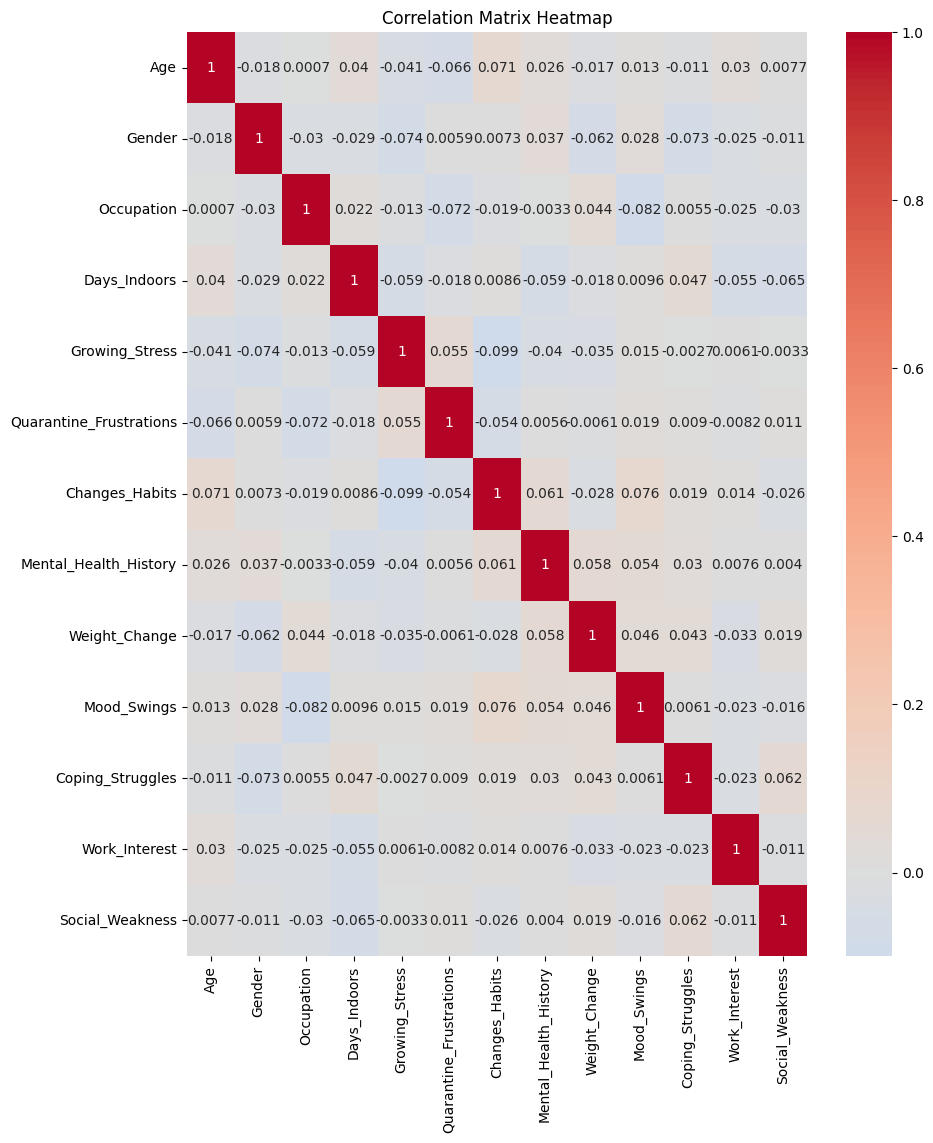

In [15]:
plt.figure(figsize=(10,12))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
# from scipy.stats import pearsonr
# import networkx as nx


# data=input.copy()

# # Encode categorical variables to numeric
# label_encoders = {col: LabelEncoder().fit(data[col]) for col in data.columns}
# encoded_data = pd.DataFrame({col: label_encoders[col].transform(data[col]) for col in data.columns})

# # Calculate Cramer's V
# def calculate_cramers_v(data):
#     n = data.shape[0]
#     cramers_v = pd.DataFrame(index=data.columns, columns=data.columns)
#     for col1 in data.columns:
#         for col2 in data.columns:
#             if col1 != col2:
#                 contingency_table = pd.crosstab(data[col1], data[col2])
#                 chi2_stat, _, _, _ = chi2_contingency(contingency_table)
#                 cramers_v.loc[col1, col2] = np.sqrt(chi2_stat / (n * min(contingency_table.shape) - 1))
#     return cramers_v

# # Get Cramer's V
# cramers_v = calculate_cramers_v(encoded_data)
# print(cramers_v)

# # Network Visualization
# G = nx.Graph()
# for col in data.columns:
#     G.add_node(col)

# for i, col1 in enumerate(data.columns):
#     for j, col2 in enumerate(data.columns):
#         if i < j:
#             weight = cramers_v.loc[col1, col2]
#             if weight > 0.1:  # Threshold for visualization
#                 G.add_edge(col1, col2, weight=weight)

# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10)
# nx.draw_networkx_edges(G, pos, width=[d['weight']*5 for (u, v, d) in G.edges(data=True)], edge_color='blue')
# plt.title('Network of Multinomial Categorical Variables')
# plt.show()

In [17]:
# # Create a graph based on a lower threshold
# G = nx.Graph()

# # Add nodes (variables)
# for col in data.columns:
#     G.add_node(col)

# # Add edges based on lower threshold (e.g., |r| ≥ 0.1)
# threshold = 0.1
# for i, col1 in enumerate(data.columns):
#     for j, col2 in enumerate(data.columns):
#         if i != j and abs(corr_matrix.iloc[i, j]) >= threshold:
#             G.add_edge(col1, col2, weight=corr_matrix.iloc[i, j])

# # Plot the network
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
# nx.draw_networkx_edges(G, pos, width=[abs(d['weight'])*5 for (u, v, d) in G.edges(data=True)])

# plt.title('Correlation Network with Lower Threshold')
# plt.show()

Growing_Stress    0    1    2
Gender                       
0               130  131  173
1               137  125  128
Chi-square test p-value: 0.09462572678960109


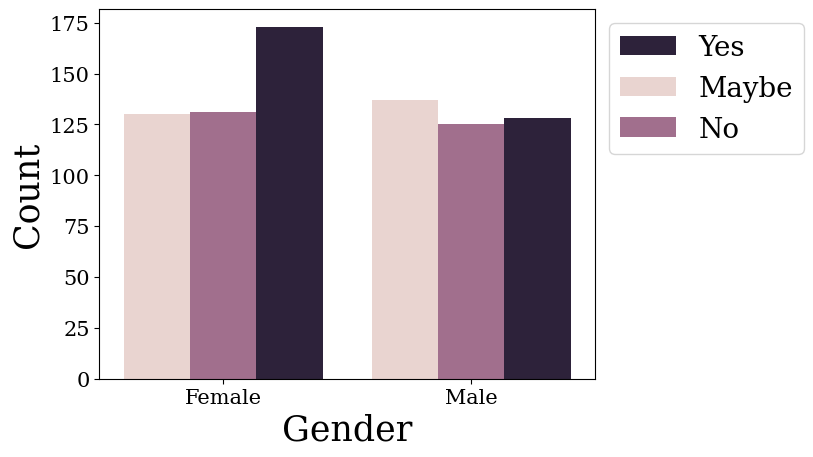

In [18]:
# Cross-tabulation
crosstab = pd.crosstab(input['Gender'], input['Growing_Stress'])
print(crosstab)

# Chi-square test
chi2, p, _, _ = stats.chi2_contingency(crosstab)
print(f'Chi-square test p-value: {p}')


# Visualizing the relationship
plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=15)

sns.countplot(x='Gender', hue='Growing_Stress', data=input)
plt.xticks(ticks=[0, 1], labels=['Female','Male'])

plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=25)
plt.ylabel(column.capitalize(), fontfamily='serif', fontsize=25)
# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 0, 1]  # Reorder: Yes, Maybe, No
reordered_handles = [handles[i] for i in order]
reordered_labels = ['Yes', 'Maybe', 'No']

legend = plt.legend(reordered_handles, reordered_labels, bbox_to_anchor=(1, 1), loc='upper left' ,fontsize=20)
plt.ylabel("Count")
plt.xlabel("Gender")

 # Add a grid with light dotted lines
#plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
#plt.title('Gender vs Growing Stress')
plt.savefig('content/Gender vs GrowingStress.png', dpi=400, bbox_inches='tight')
plt.savefig('content/Gender vs GrowingStress.pdf', dpi=400, bbox_inches='tight')
plt.show()

Chi-square test between Age and Social_Weakness: p-value = 0.03830710902642547
Chi-square test between Gender and Coping_Struggles: p-value = 0.04226636445747966


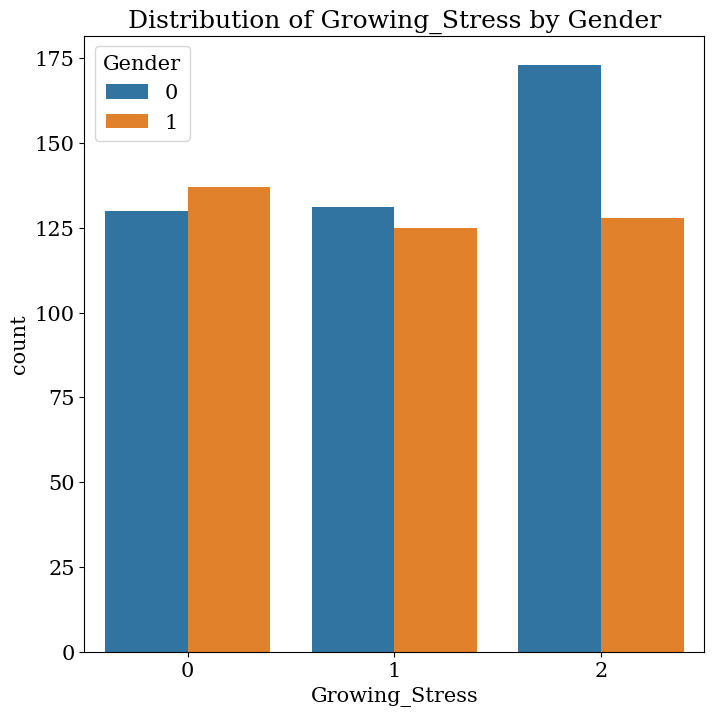

In [19]:
def chi_square_test(column1, column2, data):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    return p

categorical_columns = [
    'Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
    'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
    'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
    'Social_Weakness'
]

# Store results in a dictionary
chi_square_results = {}

# Iterate through pairs of columns
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        p_value = chi_square_test(column1, column2, input)
        chi_square_results[(column1, column2)] = p_value

# Print the p-values for each pair of variables
for key, value in chi_square_results.items():
  if(value<0.05):
    print(f"Chi-square test between {key[0]} and {key[1]}: p-value = {value}")

def create_bar_plot(column1, column2, data):
    plt.figure(figsize=(8, 8))
    sns.countplot(x=column1, hue=column2, data=data)
    plt.title(f'Distribution of {column1} by {column2}')
    plt.show()

# Example: Visualize the relationship between 'Growing_Stress' and 'Gender'
create_bar_plot('Growing_Stress', 'Gender', input)


In [20]:
import numpy as np
from scipy.stats import chi2_contingency

# Cramér's V function
def cramers_v(column1, column2, data):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Calculate Cramér's V for all categorical pairs
cramers_v_results = {}

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        v_value = cramers_v(column1, column2, input)
        cramers_v_results[(column1, column2)] = v_value

# Print Cramér's V results
for key, value in cramers_v_results.items():
    print(f"Cramér's V between {key[0]} and {key[1]}: {value}")


Cramér's V between Age and Gender: 0.04619397413970372
Cramér's V between Age and Occupation: 0.07861102264577052
Cramér's V between Age and Days_Indoors: 0.09021919821658822
Cramér's V between Age and Growing_Stress: 0.06281692380424649
Cramér's V between Age and Quarantine_Frustrations: 0.06700979017027879
Cramér's V between Age and Changes_Habits: 0.06441414301422863
Cramér's V between Age and Mental_Health_History: 0.04459233449398841
Cramér's V between Age and Weight_Change: 0.0767188463332536
Cramér's V between Age and Mood_Swings: 0.041764606987282224
Cramér's V between Age and Coping_Struggles: 0.013598153705908245
Cramér's V between Age and Work_Interest: 0.05941876419921374
Cramér's V between Age and Social_Weakness: 0.0898837497434236
Cramér's V between Gender and Occupation: 0.06532607257738741
Cramér's V between Gender and Days_Indoors: 0.040912070545244206
Cramér's V between Gender and Growing_Stress: 0.07564970829643762
Cramér's V between Gender and Quarantine_Frustratio

In [21]:
# One-way ANOVA function
def anova_test(dependent_var, independent_var, data):
    groups = [data[dependent_var][data[independent_var] == group] for group in data[independent_var].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    return p_value

# ANOVA between Gender and Work Interest
p_value_anova = anova_test('Work_Interest', 'Gender', input)
print(f"ANOVA between Gender and Work Interest: p-value = {p_value_anova}")


ANOVA between Gender and Work Interest: p-value = 0.46554172932202786


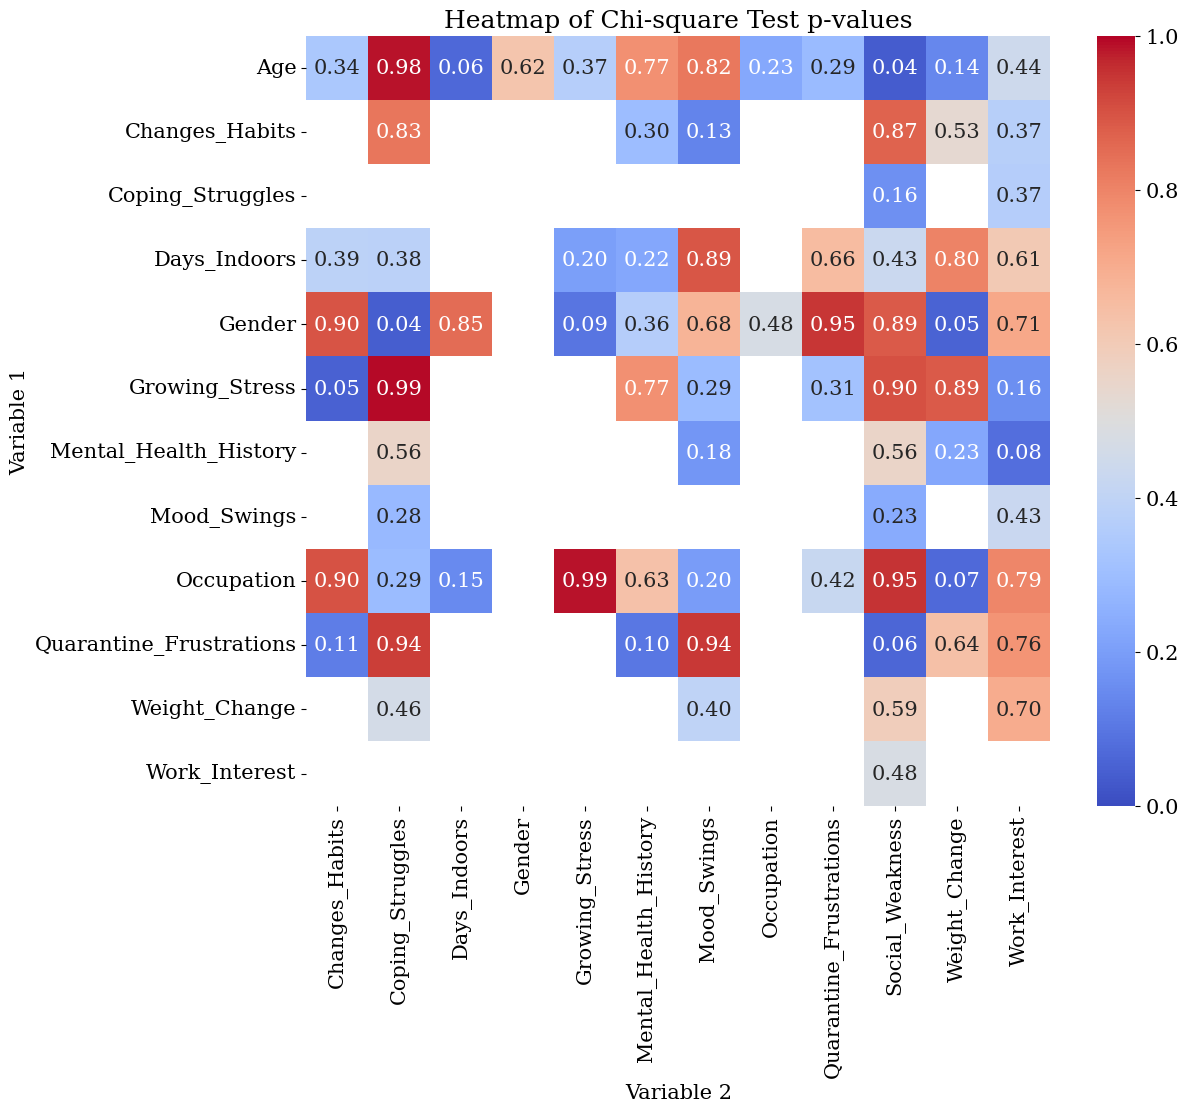

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the heatmap
p_values_df = pd.DataFrame(chi_square_results.values(), index=pd.MultiIndex.from_tuples(chi_square_results.keys(), names=['Variable 1', 'Variable 2']), columns=['p-value'])

# Pivot the DataFrame to get a matrix form suitable for heatmap
heatmap_data = p_values_df.reset_index().pivot(index='Variable 1', columns='Variable 2', values='p-value')

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title('Heatmap of Chi-square Test p-values')
plt.show()


***Correlation Network Study***

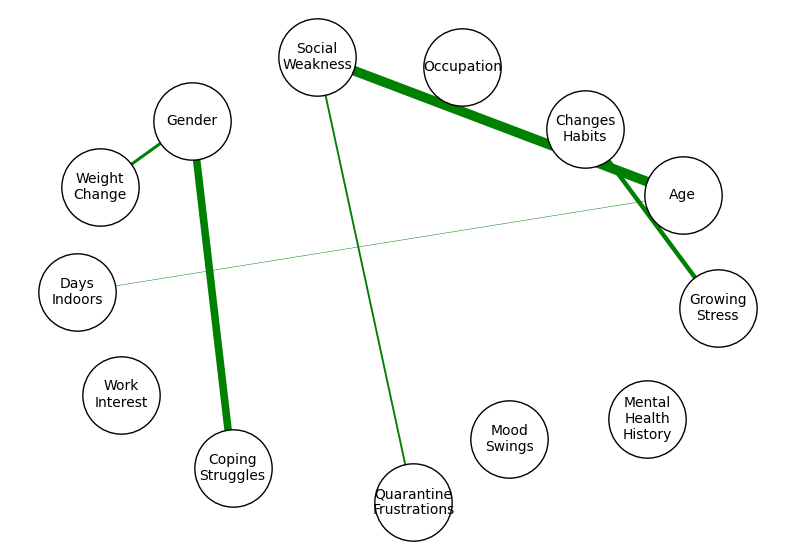

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
# Create a graph
G = nx.Graph()
node_names = {
    'Weight_Change': 'Weight\nChange',
     'Days_Indoors':'Days\nIndoors',
     'Work_Interest':'Work\nInterest',
     'Coping_Struggles':'Coping\nStruggles',
     'Quarantine_Frustrations':'Quarantine\nFrustrations',
     'Social_Weakness':'Social\nWeakness',
     'Changes_Habits':'Changes\nHabits',
     'Growing_Stress':'Growing\nStress',
     'Mood_Swings':'Mood\nSwings',
     'Mental_Health_History':'Mental\nHealth\nHistory'

}

# Rename nodes in the graph

#Add nodes
for var in categorical_columns:
    G.add_node(var)

# Add edges for significant p-values
for (var1, var2), p_value in chi_square_results.items():
    if p_value < 0.07:  # Adjust threshold if needed
        weight = 1 / p_value  # Weight inversely related to p-value
        G.add_edge(var1, var2, weight=weight)

G = nx.relabel_nodes(G, node_names)
# Extract edges and weights
edges = G.edges(data=True)
weights = [data['weight'] for u, v, data in edges]

# Normalize weights for edge width
min_weight = min(weights)
max_weight = max(weights)
norm_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in weights]
edge_widths = [w * 7 for w in norm_weights]  # Scale for better visualization

# Layout for visualization
pos = nx.spring_layout(G, k=10, seed=46)  # Adjust k to bring nodes closer
plt.figure(figsize=(10, 7))#14,9

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=3100,edgecolors='black')#7800

# Draw edges with color coding based on weights
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='green', width=edge_widths)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black",horizontalalignment='center') #19

# Title (optional)
#plt.title('Network of Significant Associations')
plt.axis('off')
#Save the figure
plt.savefig('content/Correlation Network with Weighted and Color-Coded Edges-2.png', dpi=500, bbox_inches='tight')
plt.savefig('content/Correlation Network with Weighted and Color-Coded Edges-2.pdf', dpi=500, bbox_inches='tight')
# Show plot
plt.show()


In [24]:
import networkx as nx
from networkx.algorithms.clique import find_cliques
from networkx.algorithms.approximation import clique
# Identify all maximal cliques
cliques = list(find_cliques(G))

# Find the largest maximal clique (i.e., the maximum clique)
maximum_clique = max(cliques, key=len)

print("Maximal Cliques: ", cliques)
print("Maximum Clique: ", maximum_clique)

Maximal Cliques:  [['Gender', 'Coping\nStruggles'], ['Gender', 'Weight\nChange'], ['Age', 'Social\nWeakness'], ['Age', 'Days\nIndoors'], ['Occupation', 'Weight\nChange'], ['Growing\nStress', 'Changes\nHabits'], ['Quarantine\nFrustrations', 'Social\nWeakness'], ['Mental\nHealth\nHistory'], ['Mood\nSwings'], ['Work\nInterest']]
Maximum Clique:  ['Gender', 'Coping\nStruggles']


***Chi-Sqaure Calculation & Continegency Table to find any association between the attributes***

Chi-square Statistic between Age and Social_Weakness: 13.314337795162487, P-value: 0.03830710902642547


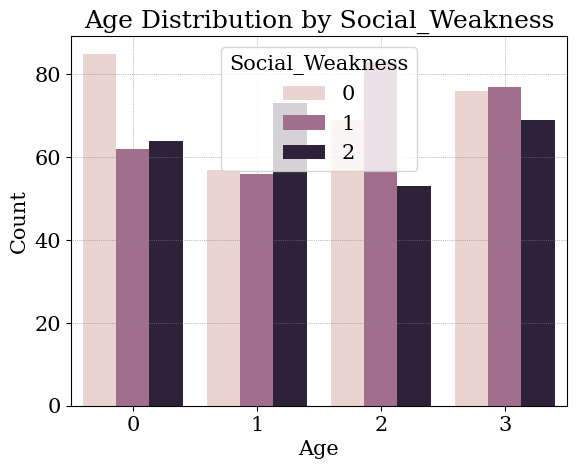

Chi-square Statistic between Gender and Coping_Struggles: 4.124505784235549, P-value: 0.04226636445747966


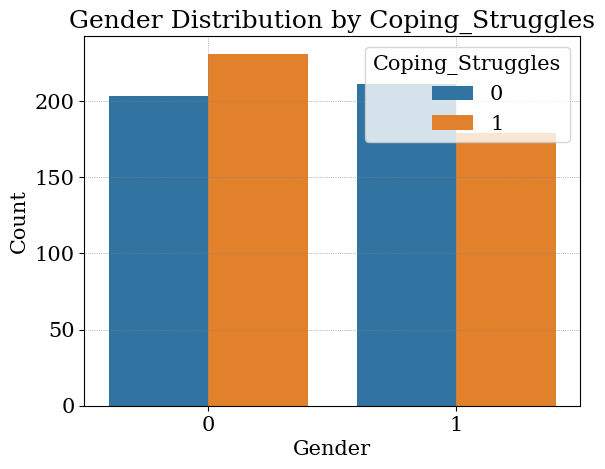

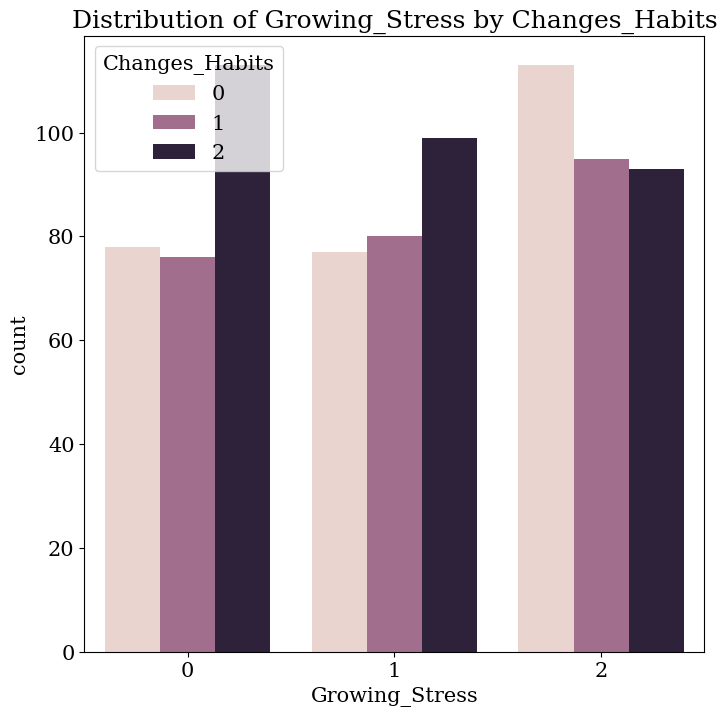

In [25]:
from itertools import combinations
# List of categorical variables
categorical_vars = [
    'Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
    'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
    'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
    'Social_Weakness'
]

# Loop through combinations of categorical variables
for var1, var2 in combinations(categorical_vars, 2):
    contingency_table = pd.crosstab(input[var1], input[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if (p<=0.05):
      print(f"Chi-square Statistic between {var1} and {var2}: {chi2}, P-value: {p}")
      # Visualization example
      sns.countplot(data=input, x=var1, hue=var2)
      # Add a grid with light dotted lines
      plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
      plt.title(f"{var1} Distribution by {var2}")
      plt.xlabel(var1)
      plt.ylabel("Count")
      plt.legend(title=var2)
      plt.show()

# Example: Visualize the relationship between 'Growing_Stress' and 'Gender'
create_bar_plot('Growing_Stress', 'Changes_Habits', input)

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

#relation between gender and other columns
gender_columns = ['Coping_Struggles','Growing_Stress','Weight_Change']

for column in gender_columns:
  # Create the contingency table
  contingency_table = pd.crosstab(input['Gender'], input[column])

  # Calculate the Chi-square test statistic, p-value, degrees of freedom, and expected frequencies
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  # Print the contingency table and the expected frequencies
  print(f"Contingency Table of Gender and {column}:")
  print(contingency_table)
  print("\nExpected Frequencies:")
  print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

  # Interpretation
  print(f"\nChi-square Statistic: {chi2}, P-value: {p}\n")



Contingency Table of Gender and Coping_Struggles:
Coping_Struggles    0    1
Gender                    
0                 203  231
1                 211  179

Expected Frequencies:
Coping_Struggles           0           1
Gender                                  
0                 218.053398  215.946602
1                 195.946602  194.053398

Chi-square Statistic: 4.124505784235549, P-value: 0.04226636445747966

Contingency Table of Gender and Growing_Stress:
Growing_Stress    0    1    2
Gender                       
0               130  131  173
1               137  125  128

Expected Frequencies:
Growing_Stress           0           1           2
Gender                                            
0               140.628641  134.834951  158.536408
1               126.371359  121.165049  142.463592

Chi-square Statistic: 4.715651773036949, P-value: 0.09462572678960109

Contingency Table of Gender and Weight_Change:
Weight_Change    0    1    2
Gender                      
0          

Social_Weakness   0   1   2
Age                        
0                85  62  64
1                57  56  73
2                69  83  53
3                76  77  69


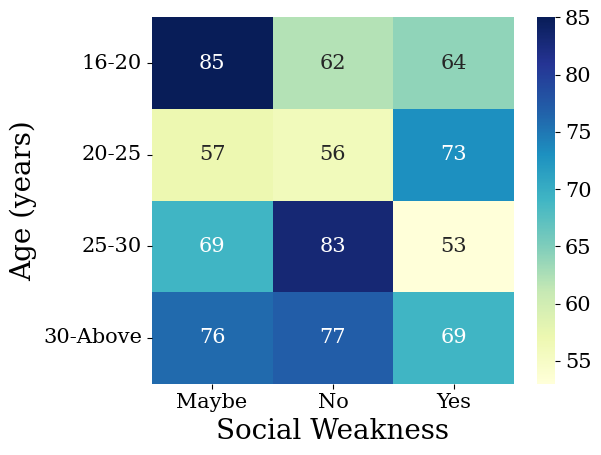

In [27]:
contingency_table = pd.crosstab(input['Age'], input['Social_Weakness'])
print(contingency_table)
# Create the heatmap
ax = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

# Adjust x and y ticks to be in the middle of each box
ax.set_xticks([x + 0.5 for x in range(len(contingency_table.columns))])  # Shift x-ticks
ax.set_yticks([y + 0.5 for y in range(len(contingency_table.index))])    # Shift y-ticks

# Set the new labels
ax.set_xticklabels(['Maybe', 'No', 'Yes'], rotation=0, ha='center',fontsize=15)
ax.set_yticklabels(['16-20', '20-25', '25-30', '30-Above'], rotation=0, va='center',fontsize=15)

plt.xlabel("Social Weakness",fontsize=20)
plt.ylabel("Age (years)",fontsize=20)
# Adjust layout
plt.tight_layout()
plt.savefig('content/Contingency table.pdf', dpi=400, bbox_inches='tight')
plt.show()

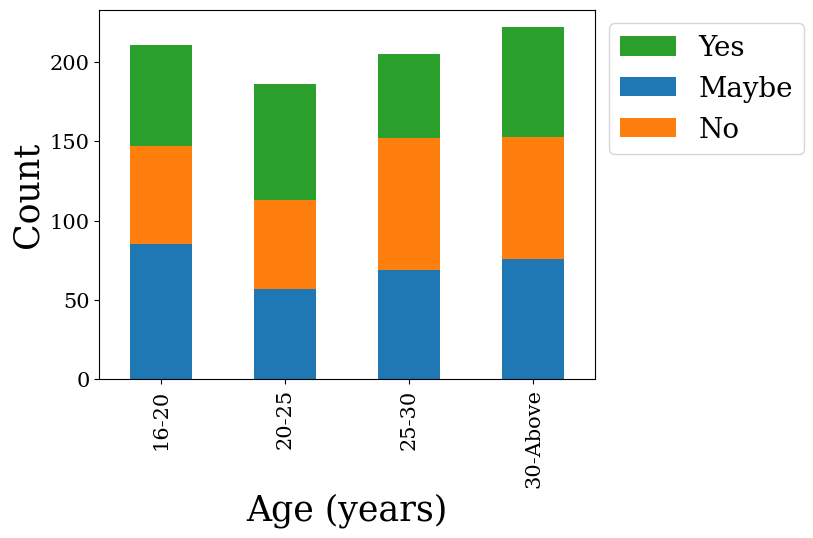

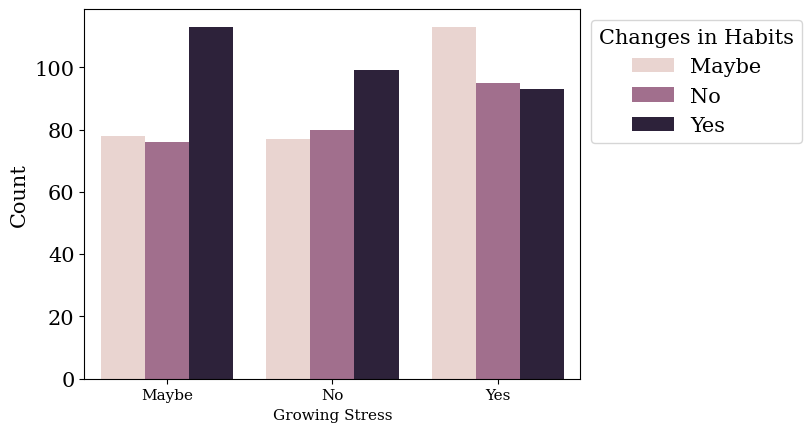

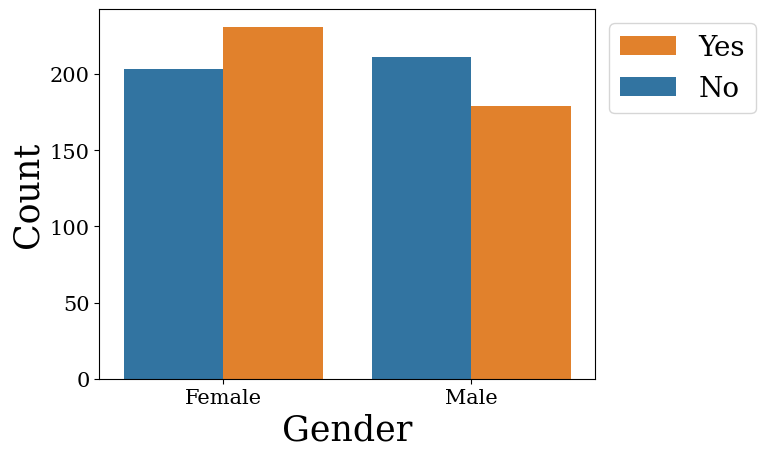

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Creating a stacked bar plot using pandas
plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=15)


# Create contingency table and plot stacked bar chart
contingency_table = pd.crosstab(input['Age'], input['Social_Weakness'])
contingency_table.plot(kind='bar', stacked=True)

# Customize x-ticks
plt.xticks(ticks=[0, 1, 2, 3], labels=['16-20', '20-25', '25-30', '30-Above'])
plt.setp(plt.gca().get_xticklabels(), fontsize=15, fontfamily='serif')

# Add labels and formatting
plt.xlabel("Age (years)", fontfamily='serif', fontsize=25)
plt.ylabel("Count", fontfamily='serif', fontsize=25)

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 0, 1]  # Reorder: Yes, Maybe, No
reordered_handles = [handles[i] for i in order]
reordered_labels = ['Yes', 'Maybe', 'No']

legend = plt.legend(reordered_handles, reordered_labels, bbox_to_anchor=(1, 1), loc='upper left' ,fontsize=20)

# Tight layout for better display and save high-resolution image

plt.savefig('content/Age_Social_Weakness.png', dpi=400, bbox_inches='tight')
plt.savefig('content/Age by Social Weakness.pdf', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()



sns.countplot(x='Growing_Stress', hue='Changes_Habits', data=input)
plt.xticks(ticks=[0, 1, 2], labels=['Maybe', 'No', 'Yes'])
plt.setp(plt.gca().get_xticklabels(), fontsize=11, fontfamily='serif')
plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=11)
plt.xlabel("Growing Stress")
plt.ylabel("Count")
legend = plt.legend(title='Changes in Habits', bbox_to_anchor=(1, 1), loc='upper left')
legend.get_texts()[0].set_text('Maybe')
legend.get_texts()[1].set_text('No')
legend.get_texts()[2].set_text('Yes')
#plt.title('Distribution of Changes in Habits across Growing Stress Levels')
plt.savefig('content/Growing_Stress_Changes_Habits.png', dpi=400, bbox_inches='tight')
plt.show()

plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=15)

sns.countplot(x='Gender', hue='Coping_Struggles', data=input)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.setp(plt.gca().get_xticklabels(), fontsize=15, fontfamily='serif')
plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=25)
plt.ylabel(column.capitalize(), fontfamily='serif',fontsize=25)
# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]  # Reorder: Yes, Maybe, No
reordered_handles = [handles[i] for i in order]
reordered_labels = ['Yes', 'No']

legend = plt.legend(reordered_handles, reordered_labels, bbox_to_anchor=(1, 1), loc='upper left' ,fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Count")
#plt.title('Gender vs Coping Struggles')
plt.savefig('content/Gender vs Coping Struggles.png', dpi=400, bbox_inches='tight')
plt.savefig('content/Gender vs Coping Struggles.pdf', dpi=400, bbox_inches='tight')
plt.show()


***PCA Analysis***

In [29]:
# from sklearn.decomposition import PCA

# # Example: PCA on the dataset
# X = input[['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
#            'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
#            'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
#            'Social_Weakness']]

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# # Plot the principal components
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2')
# plt.title('PCA of Dataset')
# plt.show()

In [30]:
# # Example to color by 'Gender'
# pca_df['Gender'] = input['Gender']
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Gender', palette='viridis')
# plt.title('PCA of Dataset by Gender')
# plt.show()
# print(pca.explained_variance_ratio_)

In [31]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# import kmodes
# from kmodes.kmodes import KModes

# # Example: K-modes clustering
# X = input[['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
#            'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
#            'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
#            'Social_Weakness']]

# # Fit k-modes clustering
# km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
# clusters = km.fit_predict(X)

# # Add cluster labels to the dataset
# #input['Cluster'] = clusters
# #print(input[['Age', 'Gender', 'Cluster']])

In [33]:
# import statsmodels.api as sm
# from sklearn.preprocessing import LabelEncoder

# # Encode the categorical variables
# le = LabelEncoder()
# input['Work_Interest'] = le.fit_transform(input['Work_Interest'])
# input['Growing_Stress'] = le.fit_transform(input['Growing_Stress'])

# # Add a constant to the model
# X = input[['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles']]
# X = sm.add_constant(X)
# y = input['Work_Interest']

# # Fit the logistic regression model
# logit_model = sm.MNLogit(y, X).fit()

# # Print the summary
# print(logit_model.summary())


In [34]:
# import statsmodels.api as sm
# from sklearn.preprocessing import LabelEncoder

# # Encode the categorical variables
# le_work_interest = LabelEncoder()
# input['Work_Interest'] = le_work_interest.fit_transform(input['Work_Interest'])

# le_growing_stress = LabelEncoder()
# input['Growing_Stress'] = le_growing_stress.fit_transform(input['Growing_Stress'])

# le_quarantine_frustrations = LabelEncoder()
# input['Quarantine_Frustrations'] = le_quarantine_frustrations.fit_transform(input['Quarantine_Frustrations'])

# le_changes_habits = LabelEncoder()
# input['Changes_Habits'] = le_changes_habits.fit_transform(input['Changes_Habits'])

# le_mental_health_history = LabelEncoder()
# input['Mental_Health_History'] = le_mental_health_history.fit_transform(input['Mental_Health_History'])

# le_coping_struggles = LabelEncoder()
# input['Coping_Struggles'] = le_coping_struggles.fit_transform(input['Coping_Struggles'])

# # Define the independent variables
# X = input[['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles']]
# X = sm.add_constant(X)

# # Define the dependent variable
# y = input['Work_Interest']

# # Fit the multinomial logistic regression model
# multinomial_logit_model = sm.MNLogit(y, X).fit()

# # Print the summary
# print(multinomial_logit_model.summary())


In [35]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.miscmodels.ordinal_model import OrderedModel

# # Assuming 'input' is your DataFrame
# # Ensure Work_Interest is ordered categorical with numeric codes
# input['Work_Interest'] = pd.Categorical(input['Work_Interest'], categories=[0, 1, 2], ordered=True)

# # Convert Work_Interest to integer codes
# input['Work_Interest'] = input['Work_Interest'].cat.codes

# # Define the independent variables
# independent_vars = ['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles']

# # Prepare the model
# model = OrderedModel(input['Work_Interest'], input[independent_vars], distr='logit')

# # Fit the model
# result = model.fit(method='bfgs')

# # Print the summary
# print(result.summary())


In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Boxplots
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Work_Interest', y='Growing_Stress', data=input)
# plt.title('Growing Stress vs Work Interest')
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Work_Interest', y='Quarantine_Frustrations', data=input)
# plt.title('Quarantine Frustrations vs Work Interest')
# plt.show()

# # Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(input.corr(), annot=True, cmap='coolwarm')
# display(input.corr())
# plt.title('Correlation Heatmap')
# plt.show()

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Encode categorical variables
# input_encoded = pd.get_dummies(input, drop_first=True)

# # Define independent and dependent variables
# X = input_encoded.drop('Work_Interest', axis=1)
# y = input_encoded['Work_Interest']

# # Fit the random forest model
# rf_model = RandomForestClassifier()
# rf_model.fit(X, y)

# # Get feature importances
# importances = rf_model.feature_importances_
# indices = np.argsort(importances)[::-1]

# # Print feature ranking
# print("Feature ranking:")
# for f in range(X.shape[1]):
#     print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# # Plot the feature importances
# plt.figure(figsize=(12, 6))
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices], align="center")
# plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()


In [38]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Prepare data
# X = input[['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Occupation', 'Days_Indoors','Social_Weakness']]
# y = input['Coping_Struggles']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# # Train random forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = rf.predict(X_test)
# print(classification_report(y_test, y_pred))


In [39]:
# from sklearn.linear_model import LogisticRegression
# rf=LogisticRegression()
# rf.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = rf.predict(X_test)
# print(classification_report(y_test, y_pred))